<a href="https://colab.research.google.com/github/ShreyaDesai2/py/blob/master/Neural%20Network_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

5

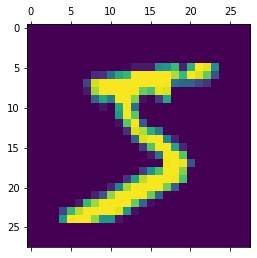

In [9]:
plt.matshow(X_train[0]);
y_train[0]

In [10]:
#for scaling
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [16]:
#simple neural network with no hidden layer
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)




Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4685 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9257


In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2660 - accuracy: 0.9271


[0.26601818203926086, 0.9271000027656555]

In [18]:
y_predicted =model.predict(X_test_flattened)
y_predicted[0]

array([1.6890675e-02, 3.1359772e-07, 5.3167969e-02, 9.6723962e-01,
       4.2787194e-03, 8.3744526e-02, 1.1791500e-06, 9.9984765e-01,
       8.6065888e-02, 6.4458996e-01], dtype=float32)

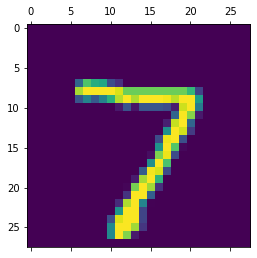

In [21]:
plt.matshow(X_test[0])

In [23]:
np.argmax(y_predicted[0])

7

In [26]:
y_predcited_labels = [np.argmax(i) for i in y_predicted]

In [27]:
y_predcited_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predcited_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    7,    3,    1,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  928,   20,    8,    3,   13,   10,   34,    4],
       [   1,    0,   15,  937,    1,   16,    2,   10,   20,    8],
       [   1,    2,    3,    1,  928,    0,   10,    4,    7,   26],
       [  10,    3,    5,   41,   11,  761,   12,    9,   32,    8],
       [  10,    3,    7,    1,    8,   11,  913,    2,    3,    0],
       [   1,    6,   22,    8,    8,    0,    0,  953,    3,   27],
       [   8,   11,    7,   21,    9,   19,    9,   13,  867,   10],
       [   8,    7,    2,   12,   33,    4,    0,   27,    7,  909]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

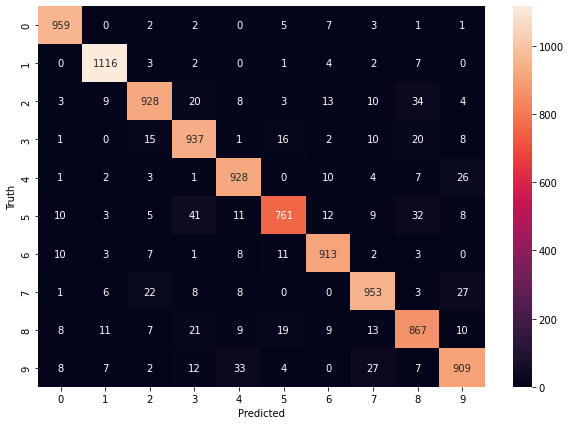

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# neural network with one hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu')
    keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)